# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### setting random seed

In [ ]:
seed=1379
np.random.seed(seed)

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 51.9MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
# X: Features, y: Classes
X_ = np.array(df.iloc[:, :-1])
y_ = np.array(df['Class'])

###Standardizing the dataset
#### Column "Class" is the out put and we will make students with class 0 fail and above 0 pass

\begin{align}
label=\left\{\begin{matrix}0\;\;\;\;\;\;\;\;\;\;Class=0
 \\1\;\;\;\;\;\;\;\;\;\;Class\geq1
\end{matrix}\right.
\end{align}

Also, we will standardize the training values by dividing them to the maximum value of each feature

In [ ]:
# making the labels 0 and 1
y = np.where(y_ > 0, 1, 0)
# deviding x feature values to their maximum value
print(X_.shape)
X = np.divide(X_, np.amax(X_, axis=0))
print(X.max())

(480, 16)
1.0


In [ ]:
# Deviding Dataset to training and validation set
X_train_tmp, X_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train_tmp))
print('Number of validation set: ', len(X_val_tmp))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


###Reshaping the data set

In [ ]:
X_train = X_train_tmp.T
X_val = X_val_tmp.T
y_train = y_train_tmp.T.reshape(1, len(y_train_tmp))
y_val = y_val_tmp.T.reshape(1, len(y_val_tmp))

print("X_train shape:", X_train.shape, "    y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "       y_val shape:", y_val.shape)

X_train shape: (16, 384)     y_train shape: (1, 384)
X_val shape: (16, 96)        y_val shape: (1, 96)


# ***Implementing Model***

## 1. Initializing Model
#####Initializing a model with two inputs: *dimensions* and *random* option

### Initialize funcion

In [ ]:
def initialize_network(dimensions, random=True):
    # e.g. dimensions=[16,20,1] input:16, hidden-1:20 output:1
    params = {}  # dictionary of params containing Wl, bl
    for l in range(len(dimensions) - 1):
        if random:
            np.random.seed(seed)

            params["W" + str(l + 1)] = np.random.randn(dimensions[l + 1], dimensions[l]) * 0.01
            params["b" + str(l + 1)] = np.random.randn(dimensions[l + 1], 1) * 0.01
        else:
            params["W" + str(l + 1)] = np.zeros((dimensions[l + 1], dimensions[l]))
            params["b" + str(l + 1)] = np.zeros((dimensions[l + 1], 1))
            
    return params

# e.g.: [16,1]
print(initialize_network([16, 1]))

{'W1': array([[ 1.85995819e-02, -5.72040108e-03, -2.92832860e-05,
         4.34899698e-03, -1.94688914e-03, -3.33358987e-03,
        -1.39013987e-02,  3.32626484e-03, -1.32216604e-03,
        -1.58638894e-02,  5.77380182e-03, -2.62317766e-02,
        -1.72477966e-03,  1.60807126e-02,  9.65543961e-03,
         9.26100345e-03]]), 'b1': array([[-0.00474711]])}


## 2. Forward Propagation



<div>
<img src="https://drive.google.com/uc?export=view&id=1BZ3Uag70dZex2wS_pziPz-H1tmw4IgN6" alt="Forward Propagation" width="600"/>
</div>


###2.1 Single Forward Propagation
#### a single forward propagation to be used in the next function of L layer network

###relu function:
\begin{align}
relu(Z)=\left\{\begin{matrix}0\;\;\;\;\;\;\;\;\;\;Z<0
 \\Z\;\;\;\;\;\;\;\;\;\;Z\geq0
\end{matrix}\right.
\end{align}

###sigmoid function:
\begin{align}
\delta(Z)=\frac{1}{1+{e}^{-Z}}
\end{align}

In [ ]:
def forward_propagation(A_, W, b, type_of_activation_function):
    Z = np.dot(W, A_) + b
    A = None
     # hidden layers: relu
    if type_of_activation_function == 'r':
        A = np.where(Z > 0, Z, 0)
    # output layer: sigmoid
    elif type_of_activation_function == 's':
        A = 1 / (1 + np.exp(-Z))
    return A, {"A_": A_, "W": W, "b": b, "Z": Z}

# np.random.seed(seed)
forward_propagation(np.random.randn(4, 1), np.random.randn(1, 4), np.random.randn(1, 1), "s")

(array([[0.87817535]]), {'A_': array([[-0.3190641 ],
         [ 0.95757684],
         [-1.45650052],
         [ 1.11307374]]),
  'W': array([[-0.19251167,  1.53203836,  1.46933957,  1.1878628 ]]),
  'Z': array([[1.97526353]]),
  'b': array([[1.26471047]])})

### 2.2 Forward Propagation for L layers

In [ ]:
def Forward_L_layers(X, L, params):
    A_ = X
    history = []
    # if network has hidden layers L-1 world be grater than 0 otherwise there is no relu activation layer and we have a
    # 1-layer netwrk with a single sigmoid output activation function

    for l in range(L - 1):
        A, his = forward_propagation(A_, params["W" + str(l + 1)], params["b" + str(l + 1)], "r")
        A_ = A
        history.append(his)
    output, his = forward_propagation(A_, params["W" + str(L)], params["b" + str(L)], "s")
    history.append(his)
    return output, history

# np.random.seed(seed)
X = np.random.randn(4, 1)
Forward_L_layers(X, 1, initialize_network([4, 1],))[0].squeeze().item()

0.4984288083141478

## 3. Computing cost
#### computing the cost of output sigmoid activation (0<=output<=1) acording to the Y label (0 or 1)

<div>
<img src="https://drive.google.com/uc?export=view&id=1NsvcoKZeeGNHQVHVsIDWyGXacO8Dxajt" alt="gradient descent" width="600"/>
</div>

In [ ]:
def computing_cost(output, Y):
    m = Y.shape[1]
    cost = -1 / m * np.sum(Y * np.log(output) + (1 - Y) * np.log(1 - output))
    return cost

# np.random.seed(seed)

label=np.random.randint(2, size=(1,4))
Output=np.random.uniform(low=0, high=1, size=(1,4))

print("label: ",label)
print("predictaion: ", Output)
print("cost: ",computing_cost( Output,label))

label:  [[0 0 1 1]]
predictaion:  [[0.23555873 0.47796031 0.41957333 0.51770248]]
cost:  0.6113733096067014


## 4. Backward Propagation

<div>
<img src="https://drive.google.com/uc?export=view&id=1CS5oajQJqVQiYBf80ltb7lvbTtEBuNWe" alt="Backward Propagation" width="600"/>
</div>

### 4.1 Calculating dZ
#### we either have relu or sigmoid function and the formula for calculading dz is:
$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$
#### so we need the drevative of these two functions:


###derivative of relu function:
\begin{align}
relu'(Z)=\left\{\begin{matrix}0\;\;\;\;\;\;\;\;\;\;Z<0
 \\1\;\;\;\;\;\;\;\;\;\;Z\geq0
\end{matrix}\right.
\end{align}

###derivative of sigmoid function:
\begin{align}
\delta'(Z)=\delta(Z)*(1-\delta(Z))
\end{align}

In [ ]:
def backward_dz(dA, Z, type_of_activation_function):
    dg = 0

    # hidden layers: calculating the derivative relu function
    if type_of_activation_function == 'r':
        dg = np.where(Z < 0, 0, 1)

    # output layer: calculating the derivative of sigmoid function
    elif type_of_activation_function == 's':
        s = 1 / (1 + np.exp(-Z))
        dg = s * (1 - s)

    dZ = dA * dg
    return dZ

###4.2 Calculating dW, db, dA_
####Using the bellow formulas we are able to calcule the gradients:


$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$

$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$

$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$




In [ ]:
def backward_params(Output, his, type_of_activation_function):

    A_=his["A_"]
    W=his["W"]
    b=his["b"]
    Z=his["Z"]

    dZ = backward_dz(Output, Z, type_of_activation_function)
    m = A_.shape[1]

    dW = 1 / m * np.dot(dZ, A_.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_ = np.dot(W.T, dZ)

    return dA_, dW, db

### 4.3 Calculating L layers of Backward Propagation
#### using the bellow formula and helping functions above, we will calculate the L layers of Backward Propagation
\begin{align}
Output'=-\frac{Y}{A}+\frac{1-Y}{1-A}
\end{align}

In [ ]:
def backward(Output, Y, L, history):
    derivatives = {}
    # derivative of the output
    dOutput = - np.divide(Y, Output) + np.divide(1 - Y, 1 - Output)

    # derivative of last layer (sigmoid)
    dA_, dW, db = backward_params(dOutput, history[L - 1], "s")
    derivatives["dA" + str(L - 1)] = dA_
    derivatives["dW" + str(L)] = dW
    derivatives["db" + str(L)] = db

    # derivative of hidden layers (relu)
    for l in range(L - 1):
        dA_, dW, db = backward_params(dA_, history[L - 2 - l], "r")
        derivatives["dA" + str(L - 2 - l)] = dA_
        derivatives["dW" + str(L - 1 - l)] = dW
        derivatives["db" + str(L - 1 - l)] = db
    return derivatives

## 4.4. Updating Parameters
using these formulas we will update the parameters for L layers

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

In [ ]:
def update(params, derivatives, L, alpha=0.1):
    for l in range(1, L + 1):
        params["W" + str(l)] = params["W" + str(l)] - alpha * derivatives["dW" + str(l)]
        params["b" + str(l)] = params["b" + str(l)] - alpha * derivatives["db" + str(l)]
    return params

## 5. Classification and Accuracy

### 5.1 Classification
#### output is the result of sigmoid function so it is between 0 and 1.
#### 0.5 is the point where the result changes

\begin{align}
Classification(X)=\left\{\begin{matrix}0\;\;\;\;\;\;\;\;\;\;Output<0.5 \\1\;\;\;\;\;\;\;\;\;\;Output\geq0.5\end{matrix}\right.
\end{align}

In [ ]:
def Classification(Output):
    return np.where(Output[0] > 0.5, 1, 0)

### 5.2 Accuracy
#### after classifing the ouput we shoud check the accuracy.
#### thus we will count the correct predicted according to Y

In [ ]:
def compute_accuracy(predicted_labels, Y):
    # finding the number of correct labeled data
    acceracy_ = predicted_labels == Y
    # claculating the percentage of true predictions
    return acceracy_.sum() / len(Y[0])

#### Testing prediction

In [ ]:
# np.random.seed(seed)

L_ = 2 - 1

X_ = np.random.uniform(low=0, high=1, size=(4, 4))
Y_ = np.random.randint(2, size=(1, 4))
params_ = initialize_network([4, 1])
Output_ = Forward_L_layers(X_, L_, params_)
predictaion_ = Classification(Output_)

print("data: ", X_)
print("Y: ", Y_)
print("predictaion: ", predictaion_)
print("accuracy is: ", compute_accuracy(Y_, predictaion_))

data:  [[0.00722859 0.18082794 0.02876041 0.10928891]
 [0.75852137 0.4722716  0.72124285 0.73066582]
 [0.2429884  0.11761213 0.30453113 0.62851108]
 [0.4380611  0.85812148 0.61218844 0.61697568]]
Y:  [[0 1 1 0]]
predictaion:  [[0 1 0 0]]
accuracy is:  0.75


# ***Training the model***

## 1. Assembling the Model
#### initializing the network
#### loop for k iteration:

> #####     forward propagations of L-1 layers
> #####     Computing cost
> #####     backward pass: computing derivatives
> #####     update parameters
> #####     compute loss and accuracy in each report_k iteration

In [ ]:
def model(X_train, Y_train, X_val, Y_val, architecture=[16, 1], alpha=0.1, k=1000, report_k=100, random=True,
          print_cost=True):
    """
    architecture = the shape of the NN e.g. [16,1] this means 16 input relu and 1 output sigmoid neurons.
    alpha ( α ) = the learning rate with the default value of 0.1 (which is rather high!)
    k = the number of iterations
    report_k = each time after this amount of iteration an accuracy and loss would be calculated
    random= random or not initialization of weights and biases
    """
    np.random.seed(seed)

    # L= number of layers minus input layer
    L = len(architecture) - 1

    # initializing model with the shape e.g. [16,20,1] and parameters (Wn, bn) will be returned
    params = initialize_network(architecture, random)

    # a dictionary for accuracy and loss of both train and validations
    accuracy_loss = {"itrations": np.array([], dtype=int), "loss_train": np.array([]), "accuracy_train": np.array([]),
                     "loss_val": np.array([]), "accuracy_val": np.array([])}
    # a dictionary for printing costs
    accuracy_loss_report_k = {"itrations": np.array([], dtype=int), "loss_train": np.array([]),
                              "accuracy_train": np.array([]), "loss_val": np.array([]), "accuracy_val": np.array([])}
    for i in tqdm(range(1, k + 1)):
        # Forward pass
        Output, history = Forward_L_layers(X_train, L, params)

        # compuring cost
        cost = computing_cost(Output, Y_train)

        # backward pass: computing derivatives
        derivatives = backward(Output, Y_train, L, history)

        # updating parameters
        params = update(params, derivatives, L, alpha)

        accuracy_loss["itrations"] = np.append(accuracy_loss["itrations"], i)
        # calculate out put of val
        Output_val, history_ = Forward_L_layers(X_val, L, params)

        # calculate loss
        accuracy_loss["loss_train"] = np.append(accuracy_loss["loss_train"], computing_cost(Output, Y_train))
        accuracy_loss["loss_val"] = np.append(accuracy_loss["loss_val"], computing_cost(Output_val, Y_val))

        # classifying the Output
        label_train = Classification(Output)
        label_val = Classification(Output_val)

        # calculate accuracy
        accuracy_loss["accuracy_train"] = np.append(accuracy_loss["accuracy_train"],
                                                    compute_accuracy(label_train, Y_train))
        accuracy_loss["accuracy_val"] = np.append(accuracy_loss["accuracy_val"], compute_accuracy(label_val, Y_val))

        if i % report_k == 0:
            accuracy_loss_report_k["itrations"] = np.append(accuracy_loss_report_k["itrations"],
                                                            accuracy_loss["itrations"][-1])
            accuracy_loss_report_k["loss_train"] = np.append(accuracy_loss_report_k["loss_train"],
                                                             accuracy_loss["loss_train"][-1])
            accuracy_loss_report_k["accuracy_train"] = np.append(accuracy_loss_report_k["accuracy_train"],
                                                                 accuracy_loss["accuracy_train"][-1])
            accuracy_loss_report_k["loss_val"] = np.append(accuracy_loss_report_k["loss_val"],
                                                           accuracy_loss["loss_val"][-1])
            accuracy_loss_report_k["accuracy_val"] = np.append(accuracy_loss_report_k["accuracy_val"],
                                                               accuracy_loss["accuracy_val"][-1])
    if print_cost:
        for key, value in accuracy_loss_report_k.items():
            print("\n")
            print(key, ' : ', value)

    return accuracy_loss, accuracy_loss_report_k


#### Testing Model

In [ ]:
np.random.seed(seed)

X_train_ = np.random.uniform(low=0, high=1, size=(16, 480))
Y_train_ = np.random.randint(2, size=(1, 480))
X_val_ = np.random.uniform(low=0, high=1, size=(16, 96))
Y_val_ = np.random.randint(2, size=(1, 96))
accuracy_loss, report_k_vals = model(X_train_, Y_train_, X_val_, Y_val_, architecture=[16, 1], alpha=0.01, k=200, report_k=50, random=True)

100%|██████████| 200/200 [00:00<00:00, 3441.52it/s]



itrations  :  [ 50 100 150 200]


loss_train  :  [0.69254792 0.69226181 0.69203328 0.69182322]


accuracy_train  :  [0.5125     0.51041667 0.51041667 0.51041667]


loss_val  :  [0.69560651 0.69599994 0.69613131 0.69611592]


accuracy_val  :  [0.44791667 0.45833333 0.45833333 0.45833333]


##2. Drawing Plot and table
### drawing the plot for accuacy and loss in train and valid

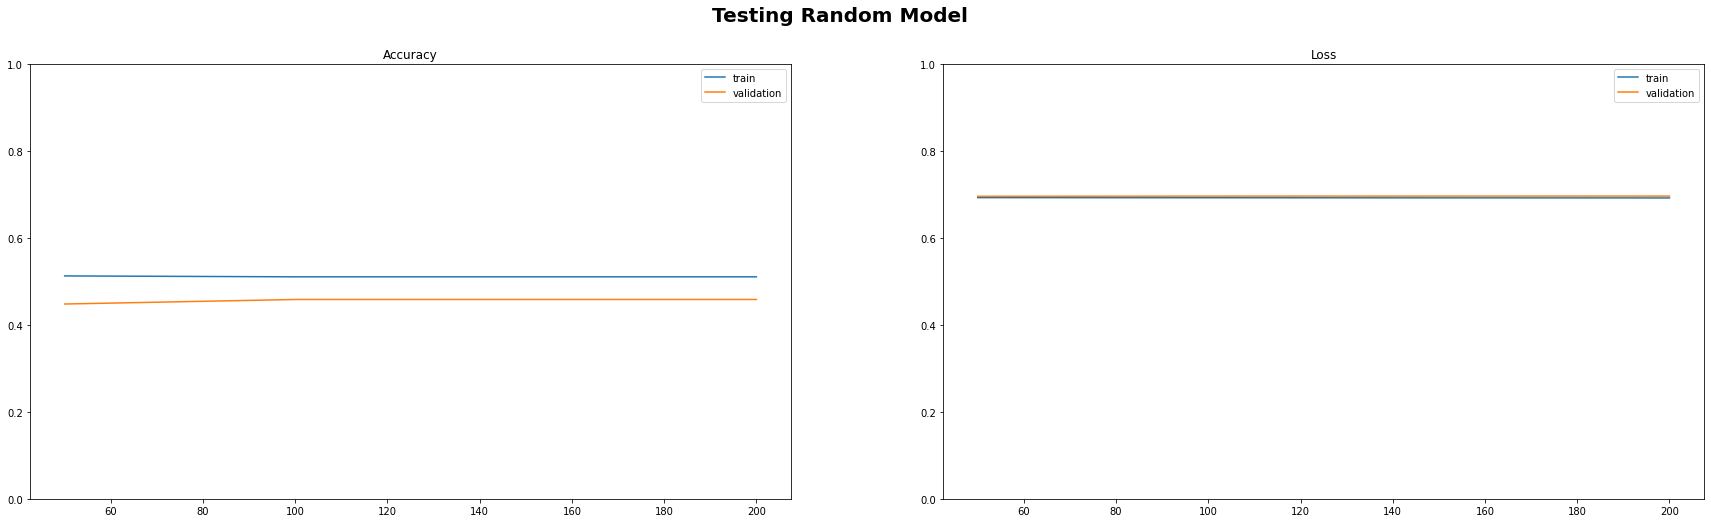

In [ ]:
def draw_pot(title, accuracy_loss):
    print("\n")
    plt.figure(figsize=(30, 8))

    plt.subplot(1, 2, 1)
    plt.ylim([0, 1])
    plt.plot(accuracy_loss["itrations"], accuracy_loss["accuracy_train"], label="train")
    plt.plot(accuracy_loss["itrations"], accuracy_loss["accuracy_val"], label="validation")
    plt.legend()
    plt.title("Accuracy")

    plt.subplot(1, 2, 2)
    plt.ylim([0, 1])
    plt.plot(accuracy_loss["itrations"], accuracy_loss["loss_train"], label="train")
    plt.plot(accuracy_loss["itrations"], accuracy_loss["loss_val"], label="validation")
    plt.legend()
    plt.title("Loss")

    plt.suptitle(title, fontsize=20, fontweight='bold')
    plt.show()


draw_pot("Testing Random Model", report_k_vals)

### functions for printing tables

In [ ]:
def print_table(data, head=['Number of Layers', 'Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy'],
    rows=['2', '3', '5']):
    # for p in data:
    #     print(p)
    table = [head]
    for i in range(len(data)):
        row_list = [rows[i]]
        for j in range(len(data[i])):
            row_list.append(data[i][j][-1])
        table.append(row_list)
    return tabulate(table, headers='firstrow', tablefmt='fancy_grid')

# a function for turning dictionary of costs and accuracies to matrix
def dic_to_matrix(data):
    tmp= [data["loss_train"], data["accuracy_train"], data["loss_val"], data["accuracy_val"]]
    # print(tmp)
    return tmp

## 3. Training Model

#### Setting Hyper Parameters

In [ ]:
architecture_2 = [16, 1]
architecture_3 = [16, 32, 1]
architecture_5 = [16, 32, 40, 8, 1]
alpha = 0.1
k = 1000
report_k = 100

### 3.1. Zero Initialization

#### 2-Layer Model Zero Initialization

100%|██████████| 1000/1000 [00:00<00:00, 3457.14it/s]




itrations  :  [ 100  200  300  400  500  600  700  800  900 1000]


loss_train  :  [0.46222579 0.41257588 0.38852168 0.37346388 0.36273872 0.35453095
 0.34796716 0.34256158 0.33801512 0.33412981]


accuracy_train  :  [0.80208333 0.81510417 0.80208333 0.8125     0.8203125  0.82291667
 0.83072917 0.8359375  0.8359375  0.83854167]


loss_val  :  [0.54928815 0.49785582 0.47487404 0.46183975 0.45350957 0.44783043
 0.44381408 0.44091462 0.4388008  0.437258  ]


accuracy_val  :  [0.70833333 0.72916667 0.76041667 0.77083333 0.78125    0.79166667
 0.80208333 0.80208333 0.8125     0.8125    ]




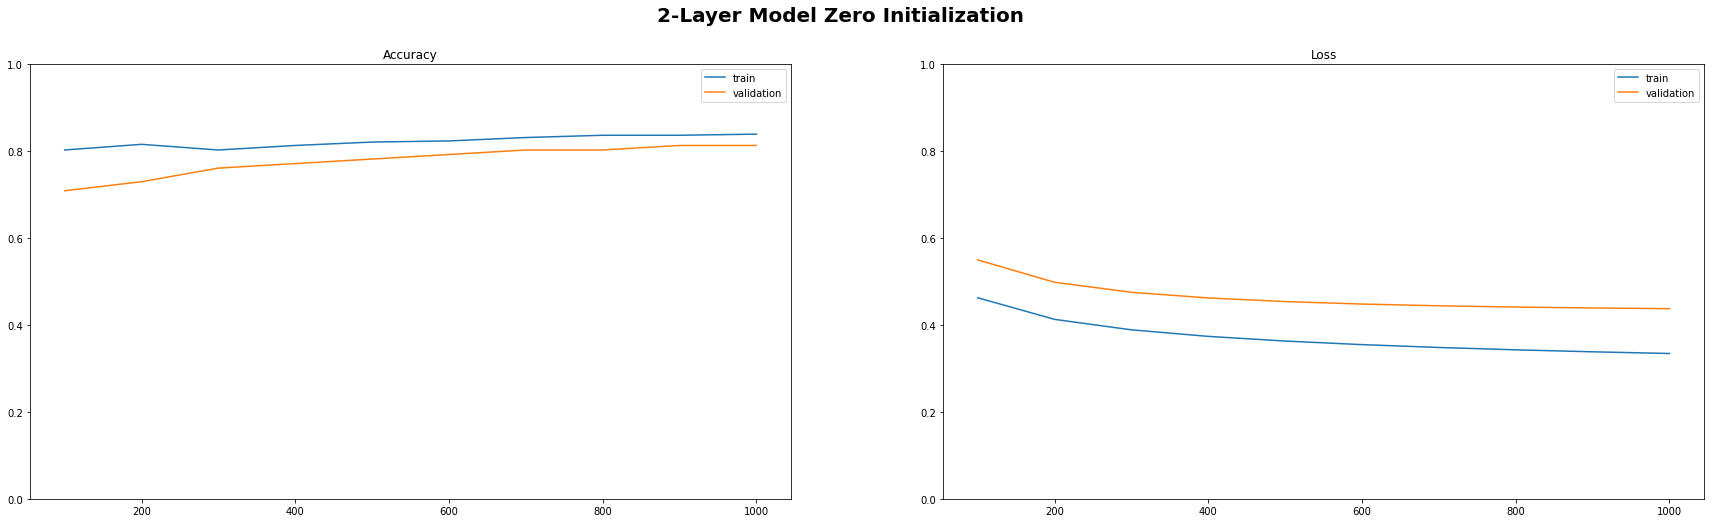

In [ ]:
accuracy_loss_zero_2, report_k_vals= model(X_train, y_train, X_val, y_val, architecture=architecture_2, alpha=alpha, k=k, report_k=report_k, random=False)
draw_pot("2-Layer Model Zero Initialization", report_k_vals)

#### 3-Layer Model Zero Initialization

100%|██████████| 1000/1000 [00:00<00:00, 1317.47it/s]




itrations  :  [ 100  200  300  400  500  600  700  800  900 1000]


loss_train  :  [0.58291262 0.58151491 0.58149004 0.58148957 0.58148956 0.58148956
 0.58148956 0.58148956 0.58148956 0.58148956]


accuracy_train  :  [0.73177083 0.73177083 0.73177083 0.73177083 0.73177083 0.73177083
 0.73177083 0.73177083 0.73177083 0.73177083]


loss_val  :  [0.70523797 0.71786345 0.71971308 0.71996977 0.72000516 0.72001004
 0.72001071 0.7200108  0.72001081 0.72001082]


accuracy_val  :  [0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375
 0.59375]




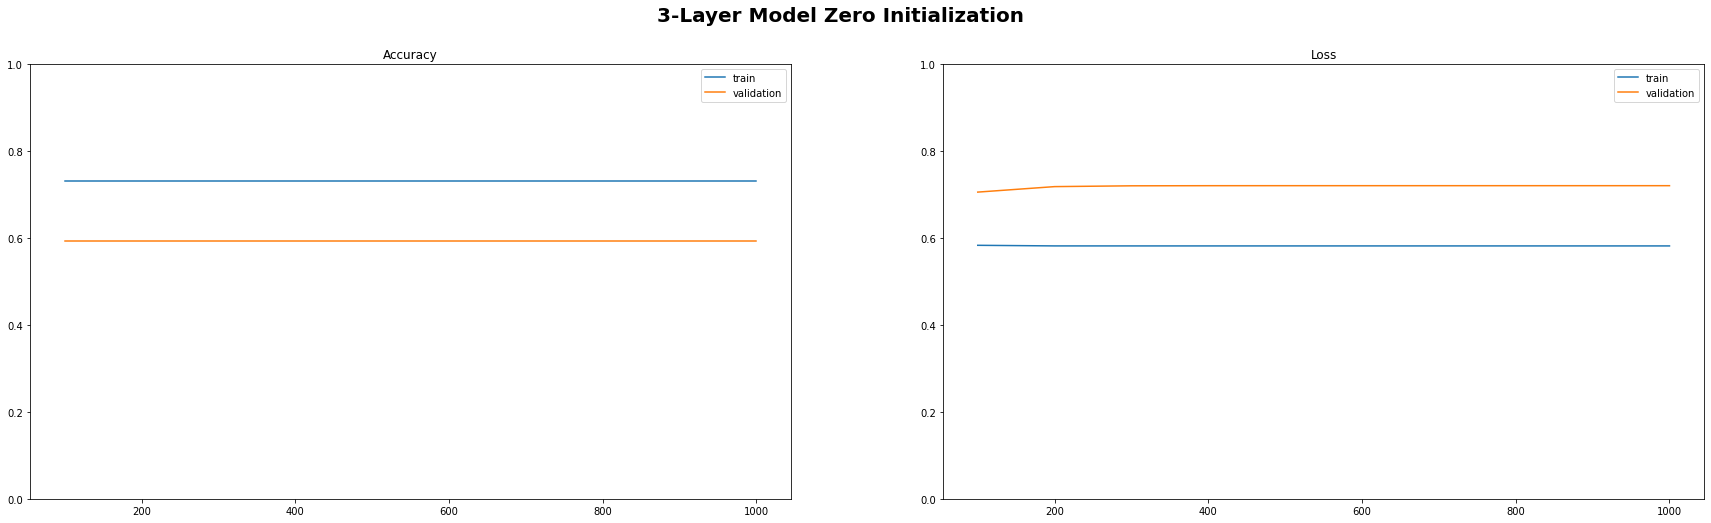

In [ ]:
accuracy_loss_zero_3, report_k_vals = model(X_train, y_train, X_val, y_val, architecture=architecture_3, alpha=alpha, k=k, report_k=report_k, random=False)
draw_pot("3-Layer Model Zero Initialization", report_k_vals)

#### 5-Layer Model Zero Initialization

100%|██████████| 1000/1000 [00:01<00:00, 656.34it/s]




itrations  :  [ 100  200  300  400  500  600  700  800  900 1000]


loss_train  :  [0.58291262 0.58151491 0.58149004 0.58148957 0.58148956 0.58148956
 0.58148956 0.58148956 0.58148956 0.58148956]


accuracy_train  :  [0.73177083 0.73177083 0.73177083 0.73177083 0.73177083 0.73177083
 0.73177083 0.73177083 0.73177083 0.73177083]


loss_val  :  [0.70523797 0.71786345 0.71971308 0.71996977 0.72000516 0.72001004
 0.72001071 0.7200108  0.72001081 0.72001082]


accuracy_val  :  [0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375
 0.59375]




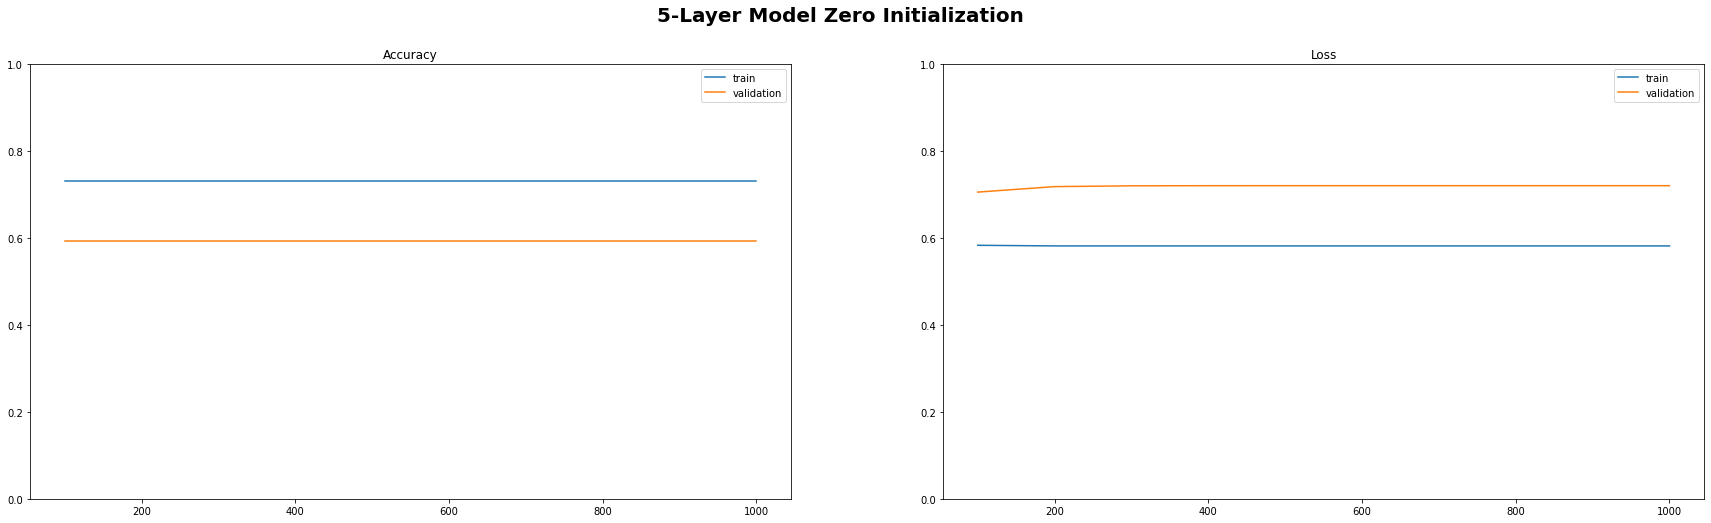

In [ ]:
accuracy_loss_zero_5, report_k_vals= model(X_train, y_train, X_val, y_val, architecture=architecture_5, alpha=alpha, k=k, report_k=report_k, random=False)
draw_pot("5-Layer Model Zero Initialization", report_k_vals)

### 3.2. Random Initialization

#### 2-Layer Model Random Initialization

100%|██████████| 1000/1000 [00:00<00:00, 3670.94it/s]




itrations  :  [ 100  200  300  400  500  600  700  800  900 1000]


loss_train  :  [0.46235197 0.41273914 0.38866299 0.3735793  0.3628334  0.35461041
 0.34803574 0.34262239 0.33807035 0.33418096]


accuracy_train  :  [0.8046875  0.81510417 0.80208333 0.81510417 0.8203125  0.828125
 0.83072917 0.8359375  0.8359375  0.83854167]


loss_val  :  [0.54966268 0.49817623 0.47509826 0.46198602 0.45359966 0.4478814
 0.44383817 0.44092038 0.43879416 0.43724307]


accuracy_val  :  [0.70833333 0.72916667 0.76041667 0.76041667 0.78125    0.79166667
 0.80208333 0.80208333 0.8125     0.8125    ]




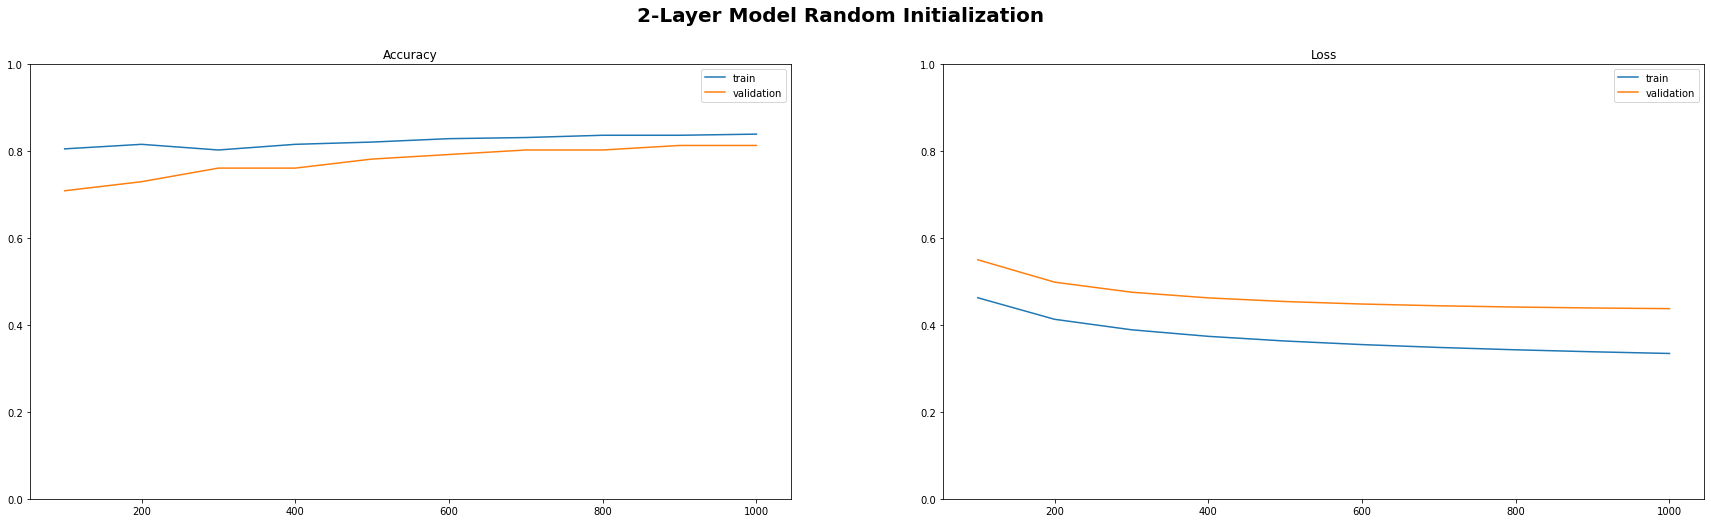

In [ ]:
accuracy_loss_random_2,report_k_vals = model(X_train, y_train, X_val, y_val, architecture=architecture_2, alpha=alpha, k=k, report_k=report_k, random=True)
draw_pot("2-Layer Model Random Initialization", report_k_vals)

#### 3-Layer Model Random Initialization

100%|██████████| 1000/1000 [00:00<00:00, 1228.17it/s]




itrations  :  [ 100  200  300  400  500  600  700  800  900 1000]


loss_train  :  [0.57883254 0.52497274 0.38739406 0.33978241 0.31989889 0.30922276
 0.30315634 0.29959075 0.29742651 0.29607513]


accuracy_train  :  [0.73177083 0.73177083 0.81770833 0.8359375  0.8515625  0.859375
 0.85677083 0.859375   0.86197917 0.86458333]


loss_val  :  [0.70110272 0.64356769 0.47594378 0.43691515 0.43121871 0.4339114
 0.4387489  0.44371737 0.44808191 0.45170119]


accuracy_val  :  [0.59375    0.59375    0.76041667 0.79166667 0.80208333 0.80208333
 0.8125     0.80208333 0.80208333 0.80208333]




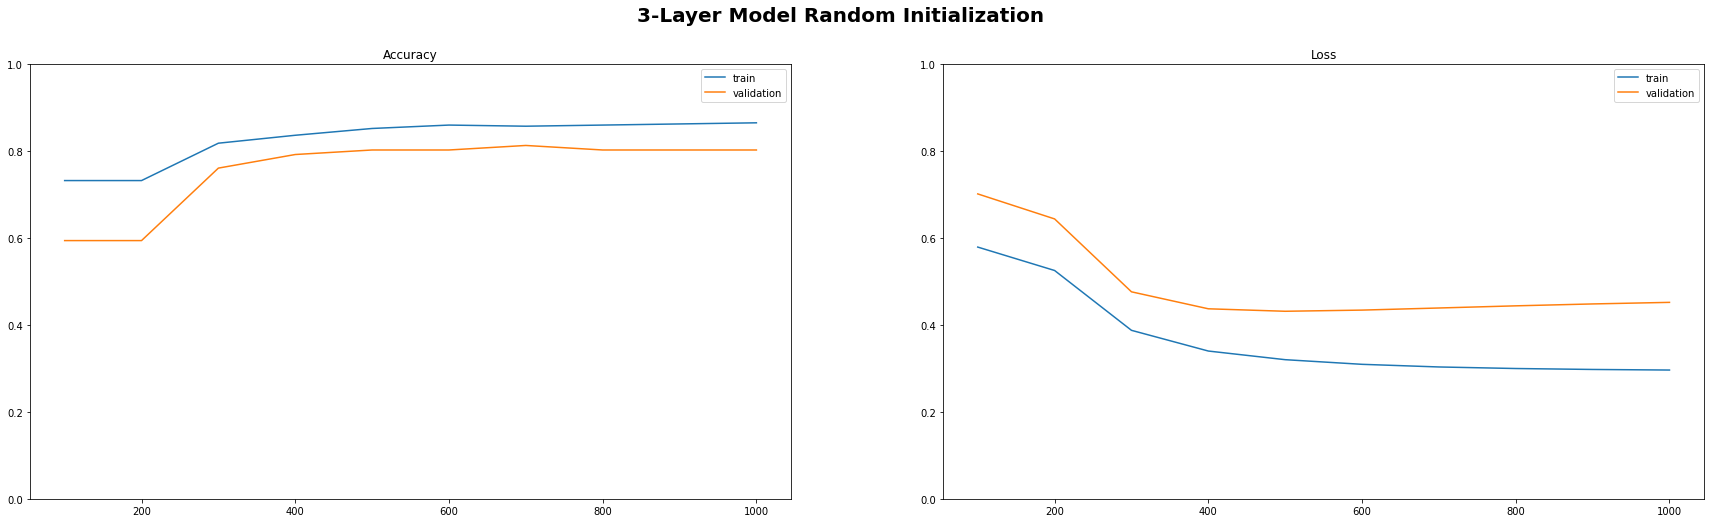

In [ ]:
accuracy_loss_random_3, report_k_vals = model(X_train, y_train, X_val, y_val, architecture=architecture_3, alpha=alpha, k=k, report_k=report_k, random=True)
draw_pot("3-Layer Model Random Initialization", report_k_vals)

#### 5-Layer Model Random Initialization

100%|██████████| 1000/1000 [00:01<00:00, 637.05it/s]




itrations  :  [ 100  200  300  400  500  600  700  800  900 1000]


loss_train  :  [0.58291426 0.5815148  0.58148994 0.58148947 0.58148946 0.58148945
 0.58148945 0.58148945 0.58148945 0.58148944]


accuracy_train  :  [0.73177083 0.73177083 0.73177083 0.73177083 0.73177083 0.73177083
 0.73177083 0.73177083 0.73177083 0.73177083]


loss_val  :  [0.70522997 0.71786398 0.71971335 0.71996978 0.7200051  0.72000996
 0.72001062 0.72001071 0.72001072 0.72001072]


accuracy_val  :  [0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375 0.59375
 0.59375]




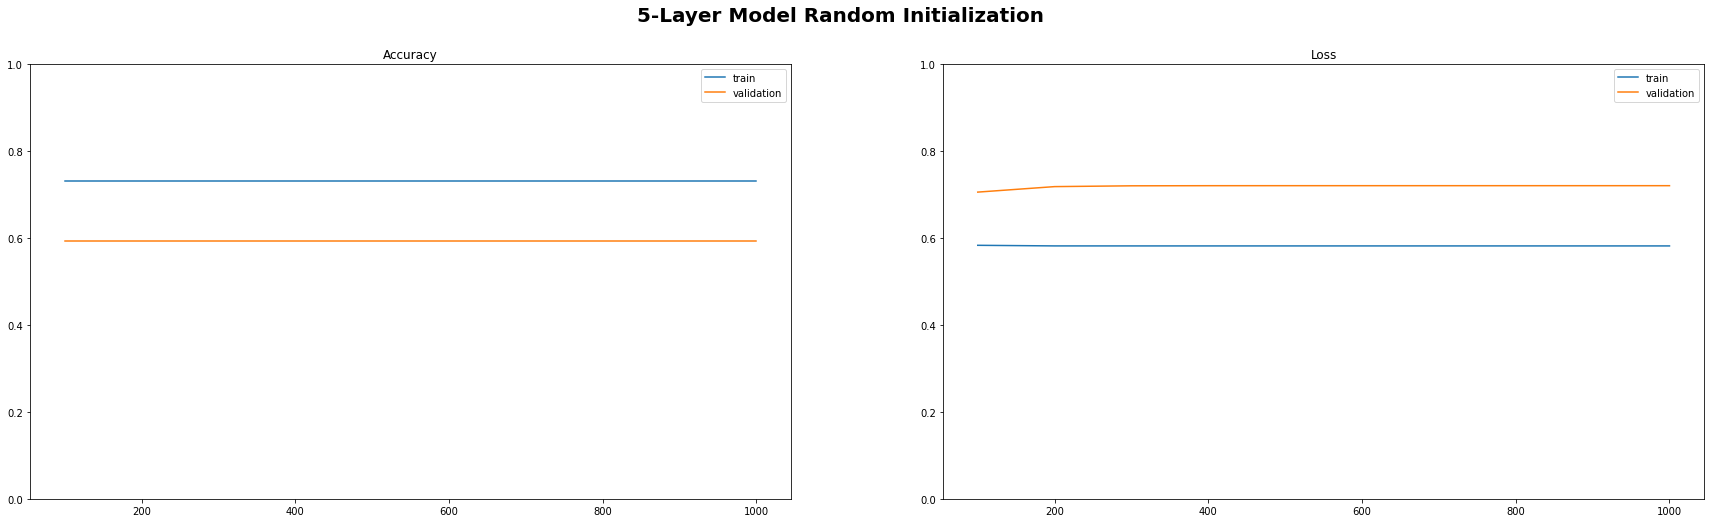

In [ ]:
accuracy_loss_random_5, report_k_vals= model(X_train, y_train, X_val, y_val, architecture=architecture_5, alpha=alpha, k=k, report_k=report_k, random=True)
draw_pot("5-Layer Model Random Initialization", report_k_vals)

# ***Evaluating the model***

###Result of the last Iteration

In [ ]:
print("\n\nzero initialization:\n")
print(print_table(
    [dic_to_matrix(accuracy_loss_zero_2), dic_to_matrix(accuracy_loss_zero_3), dic_to_matrix(accuracy_loss_zero_5)]))

print("\n\n\nRandom initialization:\n")
print(print_table([dic_to_matrix(accuracy_loss_random_2), dic_to_matrix(accuracy_loss_random_3), dic_to_matrix(accuracy_loss_random_5)]))



zero initialization:

╒════════════════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│   Number of Layers │   Train Loss │   Train Accuracy │   Val Loss │   Val Accuracy │
╞════════════════════╪══════════════╪══════════════════╪════════════╪════════════════╡
│                  2 │      0.33413 │         0.838542 │   0.437258 │        0.8125  │
├────────────────────┼──────────────┼──────────────────┼────────────┼────────────────┤
│                  3 │      0.58149 │         0.731771 │   0.720011 │        0.59375 │
├────────────────────┼──────────────┼──────────────────┼────────────┼────────────────┤
│                  5 │      0.58149 │         0.731771 │   0.720011 │        0.59375 │
╘════════════════════╧══════════════╧══════════════════╧════════════╧════════════════╛



Random initialization:

╒════════════════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│   Number of Layers │   Train Loss │   Train Accuracy │   Val Loss │   Val Acc

###Result according to the best iteration

In [ ]:
def find_max_i(data):
    max_train_accuray = np.where(data["accuracy_train"] == np.max(data["accuracy_train"]))[0][0]
    max_val_accuracy = np.where(data["accuracy_val"] == np.max(data["accuracy_val"]))[0][0]
    min_train_loss = np.where(data["loss_train"] == np.min(data["loss_train"]))[0][0]
    min_val_loss = np.where(data["loss_val"] == np.min(data["loss_val"]))[0][0]

    # creating the columns according to the report
    accuray_loss_train__min_loss = ["Accuracy: " + str(data["accuracy_train"][min_train_loss]) + "\nLoss: " + str(
        data["loss_train"][min_train_loss])]
    accuray_loss_val__min_loss = [
        "Accuracy: " + str(data["accuracy_val"][min_val_loss]) + "\nLoss: " + str(data["loss_val"][min_val_loss])]
    accuray_loss_train__max_accuracy = [
        "Accuracy: " + str(data["accuracy_train"][max_train_accuray]) + "\nLoss: " + str(
            data["loss_train"][max_train_accuray])]
    accuray_loss_val__max_accuracy = ["Accuracy: " + str(data["accuracy_val"][max_val_accuracy]) + "\nLoss: " + str(
        data["loss_val"][max_val_accuracy])]

    return [accuray_loss_train__min_loss, accuray_loss_val__min_loss, accuray_loss_train__max_accuracy,
            accuray_loss_val__max_accuracy]


print("\n\nZero initialization:\n", "\nk =", k, "\nalpha =", alpha, "\n")
print(print_table(
    [find_max_i(accuracy_loss_zero_2), find_max_i(accuracy_loss_zero_3), find_max_i(accuracy_loss_zero_5)],
    head=["Number of Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of train set\naccording to Max val Accuracy"]))

print("\n\n\nRandom initialization:\n", "\nk =", k, "\nalpha =", alpha, "\n")
print(print_table(
    [find_max_i(accuracy_loss_random_2), find_max_i(accuracy_loss_random_3), find_max_i(accuracy_loss_random_5)],
    head=["Number of Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of train set\naccording to Max val Accuracy"]))




Zero initialization:
 
k = 1000 
alpha = 0.1 

╒════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤══════════════════════════════════╕
│   Number of Layers │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of train set   │
│                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy    │
╞════════════════════╪══════════════════════════════════╪════════════════════════════════╪═══════════════════════════════════╪══════════════════════════════════╡
│                  2 │ Accuracy: 0.8385416666666666     │ Accuracy: 0.8125               │ Accuracy: 0.8385416666666666      │ Accuracy: 0.8125                 │
│                    │ Loss: 0.3341298061400587         │ Loss: 0.4372580017286208       │ Loss: 0.34183055533922524         │ Loss: 0.439002

## Optimization method

### Xavier initialization: 

### we know that z is equal to:
$$Z=b+w1⋅x1+w2⋅x2+...+wn⋅xn$$
while using Relu function we can set the variance to:
$$ \sigma^2 = {\frac{1}{size(l)}} $$
and then multiply this value in the weight matrix
$$ W_l =np.random.randn(shape)*\sqrt{\frac{2}{size(l-1)}} $$

In [ ]:
def initialize_network(dimensions, random=True):
    # e.g. dimensions=[16,20,1] input:16, hidden-1:20 output:1
    params = {}  # dictionary of params containing Wl, bl
    for l in range(len(dimensions) - 1):
        if random:
            np.random.seed(seed)

            params["W" + str(l + 1)] = np.random.randn(dimensions[l + 1], dimensions[l]) * np.sqrt(2 / dimensions[l])
            params["b" + str(l + 1)] = np.random.randn(dimensions[l + 1], 1) * np.sqrt(2 / dimensions[l])
        else:
            params["W" + str(l + 1)] = np.zeros((dimensions[l + 1], dimensions[l]))
            params["b" + str(l + 1)] = np.zeros((dimensions[l + 1], 1))

    return params

#### xavier initialization

In [ ]:
accuracy_loss_random_2_xavier, report_k_vals = model(X_train, y_train, X_val, y_val, architecture=architecture_2, alpha=alpha, k=k, report_k=report_k, random=True, print_cost=False)

100%|██████████| 1000/1000 [00:00<00:00, 3604.93it/s]


In [ ]:
accuracy_loss_random_3_xavier, report_k_vals = model(X_train, y_train, X_val, y_val, architecture=architecture_3, alpha=alpha, k=k, report_k=report_k, random=True, print_cost=False)

100%|██████████| 1000/1000 [00:00<00:00, 1173.29it/s]


In [ ]:
accuracy_loss_random_5_xavier, report_k_vals_xavier5 = model(X_train, y_train, X_val, y_val, architecture=architecture_5, alpha=alpha, k=k, report_k=report_k, random=True, print_cost=False)

100%|██████████| 1000/1000 [00:01<00:00, 570.69it/s]


####Random 0.01 vs xavier initialization of 5-layer NN

In [ ]:
print("\nRandom 0.01 vs xavier initialization of 2-layer NN:\n")

print("\nRandom initialization:\n")
print(print_table([dic_to_matrix(accuracy_loss_random_2), dic_to_matrix(accuracy_loss_random_2_xavier)],
                  rows=['0.01 Constant', 'Xavier Initializatio']))

print("\n\n Loss was reduced by ", round(-((accuracy_loss_random_2_xavier["loss_val"][-1] / accuracy_loss_random_2["loss_val"][-1]) - 1) * 100, 2), "%")
print("\n Accuracy was improved by ", round(((accuracy_loss_random_2_xavier["accuracy_val"][-1] / accuracy_loss_random_2["accuracy_val"][-1]) - 1) * 100, 2), "%\n")


Random 0.01 vs xavier initialization of 2-layer NN:


Random initialization:

╒══════════════════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│ Number of Layers     │   Train Loss │   Train Accuracy │   Val Loss │   Val Accuracy │
╞══════════════════════╪══════════════╪══════════════════╪════════════╪════════════════╡
│ 0.01 Constant        │     0.334181 │         0.838542 │   0.437243 │       0.8125   │
├──────────────────────┼──────────────┼──────────────────┼────────────┼────────────────┤
│ Xavier Initializatio │     0.33677  │         0.84375  │   0.438222 │       0.791667 │
╘══════════════════════╧══════════════╧══════════════════╧════════════╧════════════════╛


 Loss was reduced by  -0.22 %

 Accuracy was improved by  -2.56 %



In [ ]:
print("\nRandom 0.01 vs xavier initialization of 3-layer NN:\n")

print("\nRandom initialization:\n")
print(print_table([dic_to_matrix(accuracy_loss_random_3), dic_to_matrix(accuracy_loss_random_3_xavier)],
                  rows=['0.01 Constant', 'Xavier Initializatio']))

print("\n\n Loss was reduced by ", round(-((accuracy_loss_random_3_xavier["loss_val"][-1] / accuracy_loss_random_3["loss_val"][-1]) - 1) * 100, 2), "%")
print("\n Accuracy was improved by ", round(((accuracy_loss_random_3_xavier["accuracy_val"][-1] / accuracy_loss_random_3["accuracy_val"][-1]) - 1) * 100, 2), "%\n")


Random 0.01 vs xavier initialization of 3-layer NN:


Random initialization:

╒══════════════════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│ Number of Layers     │   Train Loss │   Train Accuracy │   Val Loss │   Val Accuracy │
╞══════════════════════╪══════════════╪══════════════════╪════════════╪════════════════╡
│ 0.01 Constant        │     0.296075 │         0.864583 │   0.451701 │       0.802083 │
├──────────────────────┼──────────────┼──────────────────┼────────────┼────────────────┤
│ Xavier Initializatio │     0.259952 │         0.877604 │   0.422054 │       0.833333 │
╘══════════════════════╧══════════════╧══════════════════╧════════════╧════════════════╛


 Loss was reduced by  6.56 %

 Accuracy was improved by  3.9 %



In [ ]:
print("\nRandom 0.01 vs xavier initialization of 5-layer NN:\n")


print(print_table([dic_to_matrix(accuracy_loss_random_5), dic_to_matrix(accuracy_loss_random_5_xavier)],
                  rows=['0.01 Constant', 'Xavier Initializatio']))

print("\n\n Loss was reduced by ", round(-((accuracy_loss_random_5_xavier["loss_val"][-1] / accuracy_loss_random_5["loss_val"][-1]) - 1) * 100, 2), "%")
print("\n Accuracy was improved by ", round(((accuracy_loss_random_5_xavier["accuracy_val"][-1] / accuracy_loss_random_5["accuracy_val"][-1]) - 1) * 100, 2), "%\n")


Random 0.01 vs xavier initialization of 5-layer NN:

╒══════════════════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│ Number of Layers     │   Train Loss │   Train Accuracy │   Val Loss │   Val Accuracy │
╞══════════════════════╪══════════════╪══════════════════╪════════════╪════════════════╡
│ 0.01 Constant        │     0.581489 │         0.731771 │   0.720011 │        0.59375 │
├──────────────────────┼──────────────┼──────────────────┼────────────┼────────────────┤
│ Xavier Initializatio │     0.149958 │         0.929688 │   0.37511  │        0.875   │
╘══════════════════════╧══════════════╧══════════════════╧════════════╧════════════════╛


 Loss was reduced by  47.9 %

 Accuracy was improved by  47.37 %



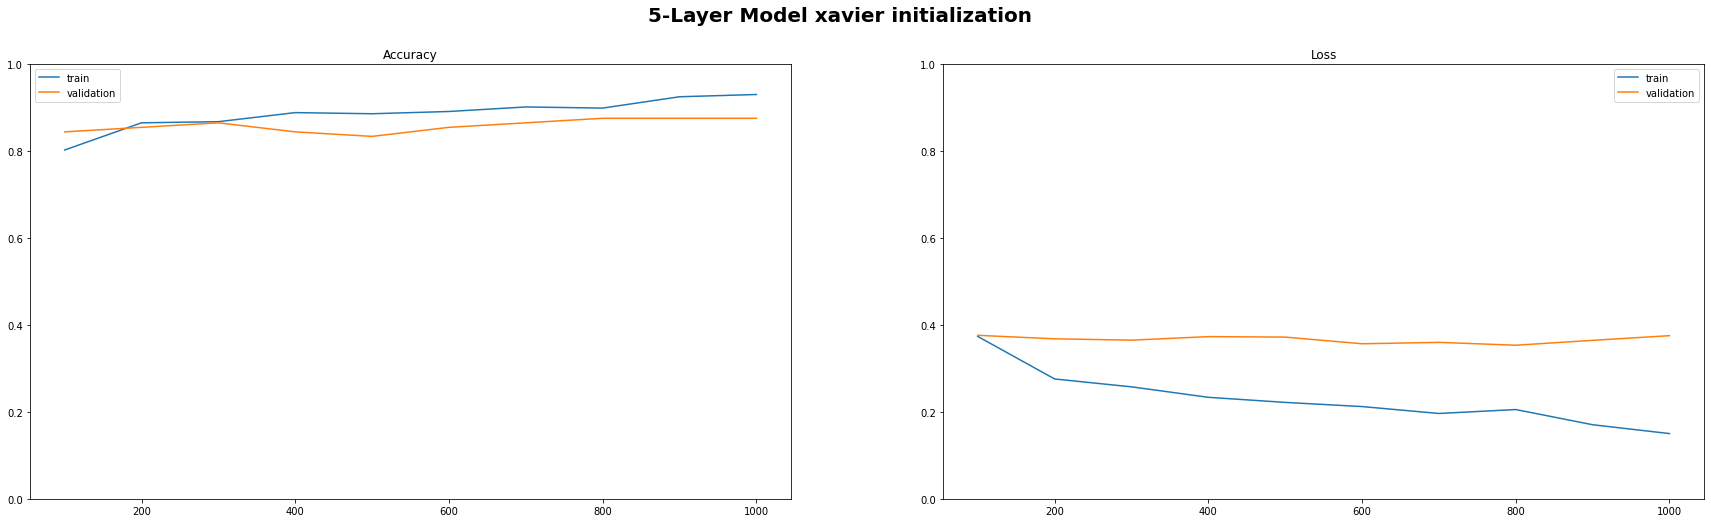

In [ ]:
draw_pot("5-Layer Model xavier initialization", report_k_vals_xavier5)